<a href="https://colab.research.google.com/github/YujinSuh/Python_ML/blob/master/Textmining%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-s

In [ ]:
import jpype
print(jpype.isJVMStarted()) #return False:not running or 0:running

False


In [ ]:
from konlpy.tag import Twitter 
from collections import Counter

** Twitter Customize **

In [ ]:
from ckonlpy.tag import Postprocessor
stopwords = {'당부','주거지','도록','주거지원','생활','현재','확인','사항','이행','상황','면서','본인','방문','관련','위해','까지','문하','중이','근황','통해','주거','인의','대상자','상기','대해','대한','특이','발생','작성','제출','마련','상태','전화','연락','문자','문제','공단','고함','개월','중임','또한','이야기','가지','대하','중이','금은','기하','다해','더욱','전하','로부터','보임','노모','자로','양곡','통해','실시','생활','준비','항상','금일','위해','대상자','담당자' }
postprocessor = Postprocessor(twitter, stopwords = stopwords)
replace = {'거주지': '주거지'}
postprocessor = Postprocessor(twitter, replace = replace)


In [ ]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기
import matplotlib.pyplot as plt

# **Raw Data**

In [ ]:
file = pd.read_excel('/content/data.csv')
file.head()

,DSJ_JUMIN_NO,DSJ_CARD_NO,CONSULT_DATE,CARE_OPEN_CLASS_CD,CARE_OPEN_CLASS_NM,CONSULT_GBN,CONSULT_GBN_NM,CONSULT_CONT
0,///tqlgHDzaIE9DI/BBYJQ==,12020160195,20160808,40,직업훈련,10.0,멘토링,허그일자리 프로그램 참여자로 대형운전면허 자격증 취득을 위해 학원에 입교조치하고 조...
1,///tqlgHDzaIE9DI/BBYJQ==,12020160195,20160830,40,직업훈련,10.0,멘토링,"대형면허 자격증을 합격하였으며, 취득 후 솔로몬방재엔지니어링(주),소방설비 및 운전..."
2,///tqlgHDzaIE9DI/BBYJQ==,12020160195,20161031,20,취업지원,20.0,사후관리,다니던 회사를 그만 두었다고 함. 재취업을 위해서 노력해 볼 것을 당부하고 취업담당...
3,///tqlgHDzaIE9DI/BBYJQ==,12020160195,20161130,20,취업지원,20.0,사후관리,-상기인은 솔로몬소방방재 엔지니어링에서 근무하였으나 개인적인 사정으로 인하여 퇴사하...
4,//1j2KsUJltLWf+kbwRVMA==,10020130211,20130508,10,숙식제공,10.0,멘토링,숙식제공 상담 및 생활지도 상담 실시


Google drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
a = file['CARE_OPEN_CLASS_NM'] == '주거지원'
a =file[a]
a.head()

,DSJ_JUMIN_NO,DSJ_CARD_NO,CONSULT_DATE,CARE_OPEN_CLASS_CD,CARE_OPEN_CLASS_NM,CONSULT_GBN,CONSULT_GBN_NM,CONSULT_CONT
160,/06UcpqabSPJLjQ83OMb2w==,90020140212,20150626,50,주거지원,10.0,멘토링,주거지원자로 선정되었고 앞으로 주거가 제시되면 선택하여 입주토록 할 것을 설명...
161,/06UcpqabSPJLjQ83OMb2w==,90020140212,20150827,50,주거지원,10.0,멘토링,주거지원 입주조치하고 착실한 노력을 독려함. 입주자 준수사항 등 고지함
162,/06UcpqabSPJLjQ83OMb2w==,90020140212,20151024,50,주거지원,10.0,멘토링,"지난 9월91일 입주 후 계속 취업활동을 해오고 있으며, 승선도중 다리를 다쳐 안..."
163,/06UcpqabSPJLjQ83OMb2w==,90020140212,20151125,50,주거지원,10.0,멘토링,지난 11월 6일 퇴원한 후 집에서 요양하면서 통원 치료를 받고 있음. 건강관리...
164,/06UcpqabSPJLjQ83OMb2w==,90020140212,20151229,50,주거지원,10.0,멘토링,한해 마무리를 잘 할 것과 새해에도 좋은 일만 있을 수 있도록 준비할 것을 당부함.


상담횟수 10회 미만은 제거

In [ ]:
a_new = a[a.groupby(['DSJ_JUMIN_NO'])['DSJ_JUMIN_NO'].transform('count') >= 10]

In [ ]:
newcol = a_new.groupby(['DSJ_JUMIN_NO']).size().to_frame('counts').reset_index()
newcol

In [ ]:
a_new

# **날짜별로 grouping - 전처리 data 새로 import**

In [ ]:
file_new = pd.read_excel('/content/new_data.xlsx')
file_new

,Unnamed: 0,DSJ_JUMIN_NO,DSJ_CARD_NO,CONSULT_DATE,CARE_OPEN_CLASS_CD,CARE_OPEN_CLASS_NM,CONSULT_GBN,CONSULT_GBN_NM,CONSULT_CONT,GROUP
0,160,/06UcpqabSPJLjQ83OMb2w==,90020140212,2015-06-26,50,주거지원,10.0,멘토링,주거지원자로 선정되었고 앞으로 주거가 제시되면 선택하여 입주토록 할 것을 설명...,NaN
1,161,/06UcpqabSPJLjQ83OMb2w==,90020140212,2015-08-27,50,주거지원,10.0,멘토링,주거지원 입주조치하고 착실한 노력을 독려함. 입주자 준수사항 등 고지함,NaN
2,162,/06UcpqabSPJLjQ83OMb2w==,90020140212,2015-10-24,50,주거지원,10.0,멘토링,"지난 9월91일 입주 후 계속 취업활동을 해오고 있으며, 승선도중 다리를 다쳐 안...",NaN
3,163,/06UcpqabSPJLjQ83OMb2w==,90020140212,2015-11-25,50,주거지원,10.0,멘토링,지난 11월 6일 퇴원한 후 집에서 요양하면서 통원 치료를 받고 있음. 건강관리...,NaN
4,164,/06UcpqabSPJLjQ83OMb2w==,90020140212,2015-12-29,50,주거지원,10.0,멘토링,한해 마무리를 잘 할 것과 새해에도 좋은 일만 있을 수 있도록 준비할 것을 당부함.,NaN
...,...,...,...,...,...,...,...,...,...,...
75175,427673,zzZ92SIzqzX0yDzYKfY06Q==,90020130361,2020-03-05,50,주거지원,10.0,멘토링,- 상기인과 유선상담함\n- 주거지원사업 담당자 변경안내 후 갱신계약과 관련하여 증...,NaN
75176,427674,zzZ92SIzqzX0yDzYKfY06Q==,90020130361,2020-03-17,50,주거지원,10.0,멘토링,- 상기인과 유선상담함.\n- 담당자 변경됨을 알려주고 애로사항 및 문의사항을 새로...,NaN
75177,427675,zzZ92SIzqzX0yDzYKfY06Q==,90020130361,2020-04-14,50,주거지원,10.0,멘토링,"- 상기인과 유선상담함. LH와 갱신계약 완료하여 관련 내용을 안내함,\n- 앞으로...",NaN
75178,427676,zzZ92SIzqzX0yDzYKfY06Q==,90020130361,2020-05-26,50,주거지원,10.0,멘토링,- 목수 인테리어 관련하여 지속적으로 일을하고 있으며 주거환경 개선사업관련 도배장판...,NaN


In [ ]:
#a_new.loc[:,['DSJ_JUMIN_NO','CONSULT_DATE']].sort_values(by=['CONSULT_DATE'], axis=0, ascending=False).head(20)
a_new2= a_new['DSJ_JUMIN_NO']==	'/06UcpqabSPJLjQ83OMb2w=='
a_new2=a_new[a_new2]
a_new2
a_new2.loc[:,['DSJ_JUMIN_NO','CONSULT_DATE']]

NameError: ignored

In [ ]:
import datetime
file_new['year'] = pd.DatetimeIndex(file_new['CONSULT_DATE']).year
file_new['month'] = pd.DatetimeIndex(file_new['CONSULT_DATE']).month

In [ ]:
file_new['REAL_DATE'] = file_new['CONSULT_DATE'].apply(lambda x: datetime.date(x.year,x.month,x.day))

In [ ]:
file_new=file_new.drop(['CARE_OPEN_CLASS_CD', 'CONSULT_GBN', 'CONSULT_GBN_NM'], axis=1) # 불필요한 col 제거
#file_new[100:130]

In [ ]:
file_new.iat[1,9]-file_new.iat[2,9]

datetime.timedelta(-58)

계차수열 seq_date 함수 ( 30, 90, 180, 300, 450 , ... , )

In [ ]:
def seq_date(n):
  diff= 2
  ans = 30
  cnt = 1

  while cnt <= n:
    ans += diff*30
    diff += 1
    cnt += 1

  return ans


In [ ]:
jumin = file_new.iat[0,1] #
# year = file_new.iat[0,10]
# month = file_new.iat[0,11]
date = file_new.iat[0,9]
count = 0
group=[]
i=0
for index, row in file_new.iterrows():
    if row[1]=='DSJ_JUMIN_NO':
        continue
    
    if jumin != row[1]:
      i=0
      count=0
      jumin = row[1]
      date = row[9]

    if (row[9] -date) >= datetime.timedelta(30) :
      count+=1
      date = row[9]
      i+=1

    group.append(count)


In [ ]:
file_new['GROUP']=group

In [ ]:
groupA = file_new[file_new['GROUP']==0]
groupB = file_new[(file_new['GROUP']>=1) & (file_new['GROUP']<=4)] #2~5개월
groupC = file_new[(file_new['GROUP']>=5) & (file_new['GROUP']<=11)] #6~12개월
groupD = file_new[(file_new['GROUP']>=12) & (file_new['GROUP']<=23)] #13~24개월
groupE = file_new[file_new['GROUP']>=23] #이후

#groupF = file_new[file_new['GROUP']>=7]


In [ ]:
groupA.head()

,Unnamed: 0,DSJ_JUMIN_NO,DSJ_CARD_NO,CONSULT_DATE,CARE_OPEN_CLASS_NM,CONSULT_CONT,GROUP,year,month,REAL_DATE
0,160,/06UcpqabSPJLjQ83OMb2w==,90020140212,2015-06-26,주거지원,주거지원자로 선정되었고 앞으로 주거가 제시되면 선택하여 입주토록 할 것을 설명...,0,2015,6,2015-06-26
50,210,/0a1BUYd5vM8/59IxGggrQ==,40020120096,2013-04-02,주거지원,"전화통화를 하였으며, 주거지원 임대보증금을 전세로 전환하였는데 전세전환분에 대한 임...",0,2013,4,2013-04-02
51,211,/0a1BUYd5vM8/59IxGggrQ==,40020120096,2013-04-22,주거지원,"지부를 방문하여 상담을 하였으며, 창업지원센타에서 자신의 사업을 시작할 수 있게되었...",0,2013,4,2013-04-22
97,525,/4zuWNpouaOkvk2h5C4cxQ==,90020100374,2013-02-20,주거지원,부동산 중개보조원으로 일하고 있으나 주택경기 불황으로 인하여 어려움이 많다고 하여 ...,0,2013,2,2013-02-20
160,768,/7eR//pUlrGm+sYoZmj0Zw==,10020120199,2013-01-07,주거지원,전달과 변동사항 없이 포스코건설 협력업체 일양로지스 직원으로 근무,0,2013,1,2013-01-07


10% sampling (시간 오래걸려서 10%만 우선 실행)

In [ ]:
a_sample=file_new.sample(frac = 0.5, random_state=1)
a_sample

,Unnamed: 0,DSJ_JUMIN_NO,DSJ_CARD_NO,CONSULT_DATE,CARE_OPEN_CLASS_CD,CARE_OPEN_CLASS_NM,CONSULT_GBN,CONSULT_GBN_NM,CONSULT_CONT,GROUP,year,month
54712,302656,Qr3ZEpf82XLe7LT5gHsDBw==,20020120005,2013-08-07,50,주거지원,10.0,멘토링,"계속다니고 있음, 바쁘고 새벽에 출근하면서 일하고 있고, 특별한 사항없음",NaN,2013,8
63730,358763,uW4uk1MTzYeiKSNIsV7tIA==,60020140071,2018-11-02,50,주거지원,10.0,멘토링,법사랑 한마음대회에서 자녀장학금을 안내하고 신청하도록 함. \n\n현재 성실히 근무...,NaN,2018,11
31428,175686,H9LdDxfD2d58Uy6ZmbWIdQ==,80020100012,2016-02-11,50,주거지원,10.0,멘토링,"자립계획 이행상황 통보서 제출을 독려함.\n근검, 절약을 주지함.",NaN,2016,2
27823,155809,frCMXjbs5eUfWj5cFoHQjA==,90020160058,2018-02-05,50,주거지원,10.0,멘토링,설명절 맞이 주거지원가정 위문행사 대상자로 선정된 이성도씨에게 전화연락하여 위문 관...,NaN,2018,2
30729,170915,guhvNivlHYaVnhodOtYhFA==,140020150168,2015-07-03,50,주거지원,10.0,멘토링,"처와함께 내방하여 주거지원약정서 체결함, 7월23일경 이사예정임, 향후 취업성공패키...",NaN,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...
24834,139231,EkiQJrqOKJIJLx/9dlvsvg==,120020120337,2017-03-29,50,주거지원,10.0,멘토링,- 주거 연장 증액임대료 납부하여 연장정차 진행함\n- 취업관계로 타지 현장(수원)...,NaN,2017,3
43997,240469,lznoZaG5jumo3uq4jvpwsw==,130020130020,2018-08-13,50,주거지원,10.0,멘토링,- 임대료 및 공과금 연체없이 공단 주거지원 제반준수 사항 성실히 잘 이행하고 있음...,NaN,2018,8
8762,50063,5ki0CSwQoc+CGThDaEmLbQ==,100020110154,2013-05-22,50,주거지원,10.0,멘토링,점차 가정생활에 안정을 찾아가는 편이나 건강 문제로 취업활동을 계속 할 수 없어 경...,NaN,2013,5
53413,292785,PZkuX+tvaYsAqiVyMQYkPg==,70020130456,2016-01-05,50,주거지원,10.0,멘토링,음주상태로 막내딸과 방문 / 2015년12.28일 경 큰딸이 임신상태로 교통사고로 ...,NaN,2016,1


export from colab

In [ ]:
from google.colab import files
a_new.to_excel('filename.xlsx') 
files.download('filename.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
listsA = np.array(groupA['CONSULT_CONT'].tolist())
listsB = np.array(groupB['CONSULT_CONT'].tolist())
listsC = np.array(groupC['CONSULT_CONT'].tolist())
listsD = np.array(groupD['CONSULT_CONT'].tolist())
listsE = np.array(groupE['CONSULT_CONT'].tolist())
#listsF = np.array(groupF['CONSULT_CONT'].tolist())

In [ ]:
!pip install customized_konlpy
from ckonlpy.tag import Twitter
from ckonlpy.tag import Postprocessor


In [ ]:

twitter = Twitter()
twitter.add_dictionary(['주거지원자', '특이사항', '특별한사항', '애로사항','거주지','주거지','주거지원','입주자','준수사항','이행상황','이행사항','변동사항','미납금','예치금','지금','정산금','기초수급자','자립이행상황통보서',''], 'Noun') #사용자사전

stopwords = {'당부','주거지','도록','주거지원','생활','현재','확인','사항','이행','상황','면서','본인','방문','관련','위해','까지','문하','중이','근황','통해','주거','인의','대상자','상기','대해','대한','특이','발생','작성','제출','마련','상태','전화','연락','문자','문제','공단','고함','개월','중임','또한','이야기','가지','대하','중이','금은','기하','다해','더욱','전하','로부터','보임','노모','자로','양곡','통해','실시','생활','준비','항상','금일','위해','대상자','담당자' }
postprocessor = Postprocessor(twitter, stopwords = stopwords)
replace = {'거주지': '주거지'}
postprocessor = Postprocessor(twitter, replace = replace)


/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
morphsA = [] 
for sentence in listsA: 
  morphsA.append(twitter.pos(sentence)) 

In [ ]:


morphsB = [] 
for sentence in listsB: 
  morphsB.append(twitter.pos(sentence))

morphsC = [] 
for sentence in listsC: 
  morphsC.append(twitter.pos(sentence)) 

morphsD = [] 
for sentence in listsD: 
  morphsD.append(twitter.pos(sentence))

morphsE = [] 
for sentence in listsE: 
  morphsE.append(twitter.pos(sentence))

#morphsF = [] 
#for sentence in listsF: 
#  morphsF.append(twitter.pos(sentence)) 
  

In [ ]:
noun_adj_adv_listA=[] 
for sentence in morphsA : 
  for word, tag in sentence : 
    if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
      noun_adj_adv_listA.append(word) 

noun_adj_adv_listB=[] 
for sentence in morphsB : 
  for word, tag in sentence : 
    if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
      noun_adj_adv_listB.append(word) 

noun_adj_adv_listC=[] 
for sentence in morphsC : 
  for word, tag in sentence : 
    if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
      noun_adj_adv_listC.append(word) 

noun_adj_adv_listD=[] 
for sentence in morphsD : 
  for word, tag in sentence : 
    if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
      noun_adj_adv_listD.append(word) 

noun_adj_adv_listE=[] 
for sentence in morphsE : 
  for word, tag in sentence : 
    if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
      noun_adj_adv_listE.append(word) 

#noun_adj_adv_listF=[] 
#for sentence in morphsF : 
#  for word, tag in sentence : 
#    if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
#      noun_adj_adv_listF.append(word) 


NameError: ignored

In [ ]:
noun_adj_adv_listA = [a for a in noun_adj_adv_listA if len(a) > 1] 
count = Counter(noun_adj_adv_listA)
wordsE = dict(count.most_common())

noun_adj_adv_listB = [a for a in noun_adj_adv_listB if len(a) > 1] 
count = Counter(noun_adj_adv_listB)
wordsE = dict(count.most_common())

noun_adj_adv_listC = [a for a in noun_adj_adv_listC if len(a) > 1] 
count = Counter(noun_adj_adv_listC)
wordsE = dict(count.most_common())

noun_adj_adv_listD = [a for a in noun_adj_adv_listD if len(a) > 1] 
count = Counter(noun_adj_adv_listD)
wordsD = dict(count.most_common())

noun_adj_adv_listE = [a for a in noun_adj_adv_listE if len(a) > 1] 
count = Counter(noun_adj_adv_listE)
wordsE = dict(count.most_common())

#noun_adj_adv_listF = [a for a in noun_adj_adv_listF if len(a) > 1] 
#count = Counter(noun_adj_adv_listF)
#wordsF = dict(count.most_common())


#wordsE = sorted(words.items(), key=lambda x: x[1], reverse=True)
# wordsE

NameError: ignored

# ** '주거지원'의 text - 유의미한 noun 만 뽑아서 확인 **

In [ ]:
condition=['당부','주거지','도록','주거지원','생활','현재','확인','사항','이행','상황','면서','본인','방문','관련','위해','까지','문하','중이','근황','통해','주거','인의','대상자','상기','대해','대한','특이','발생','작성','제출','마련','상태','전화','연락','문자','문제','공단','고함','개월','중임','또한','이야기','가지','대하','중이','금은','기하','다해','더욱','전하','로부터','보임','노모','자로','양곡','통해','실시','생활','준비','항상','금일','위해','대상자','담당자' ]

for ele in noun_adj_adv_list:
  if ele in condition:
    noun_adj_adv_list.remove(ele)

noun_adj_adv_list


In [ ]:
countA = Counter(noun_adj_adv_listA)
wordsA = dict(countA.most_common())

countB = Counter(noun_adj_adv_listB)
wordsB = dict(countB.most_common())

countC = Counter(noun_adj_adv_listC)
wordsC = dict(countC.most_common())

countD = Counter(noun_adj_adv_listD)
wordsD = dict(countD.most_common())

countE = Counter(noun_adj_adv_listE)
wordsE = dict(countE.most_common())

#countF = Counter(noun_adj_adv_listF)
#wordsF = dict(countF.most_common())

NameError: ignored

In [ ]:
type(wordsB)

dict

In [ ]:
condition=['당부','주거지','도록','주거지원','생활','현재','확인','사항','이행','상황','면서','본인','방문','관련','위해','까지','문하','중이','근황','통해','주거','인의','대상자','상기','대해','대한','특이','발생','작성','제출','마련','상태','전화','연락','문자','문제','공단','고함','개월','중임','또한','이야기','가지','대하','중이','금은','기하','다해','더욱','전하','로부터','보임','노모','자로','양곡','통해','실시','생활','준비','항상','금일','위해','대상자','담당자' ]
#for k, v in wordsB.items():
#  if k in condition:
#    del wordsB[k]
for i in condition:
  if i in wordsA:
    del wordsA[i]
  else:
    pass
for i in condition:
  if i in wordsB:
    del wordsB[i]
  else:
    pass
for i in condition:
  if i in wordsC:
    del wordsC[i]
  else:
    pass
for i in condition:
  if i in wordsD:
    del wordsD[i]
  else:
    pass
for i in condition:
  if i in wordsE:
    del wordsE[i]
  else:
    pass

NameError: ignored

# WordCloud

In [ ]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)



In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 144505 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


In [ ]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib
sys_font number: 48
['/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationS

In [ ]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' , background_color='white', width=1500, height=1000).generate_from_frequencies(words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

NameError: ignored

In [ ]:
wordcloud.to_file('주거지원.png')

# **네트워크 분석**

In [ ]:
lists_new = np.array(noun_adj_adv_listA)
lists_new

array(['주거지원자', '선정', '주거', ..., '현장', '지도', '방문'], dtype='<U9')

In [ ]:
dataset=[]
for i in range(1000):
  tmp = twitter.nouns(listsA[i])
  newlist = [x for x in tmp if len(x)>1 and x !='도록' and x!='위해' and x!="문하" and x!='본인' and x!='관련' and x!='활동' and x!='지부']
  dataset.append(newlist)



In [ ]:
pip install apyori

In [ ]:
import re
import networkx as nx

In [ ]:
from apyori import apriori
result =(list(apriori(dataset,min_support=0.05)))
df=pd.DataFrame(result)
df['length']=df['items'].apply(lambda x : len(x))
df = df[(df['length']==2)&(df['support']>=0.05)].sort_values(by='support',ascending = False) #0.01로 바꾸기 


In [ ]:
if '당부' in df.items():
  print(True)

In [ ]:
G  = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [ ]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize)-min(nsize))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/l

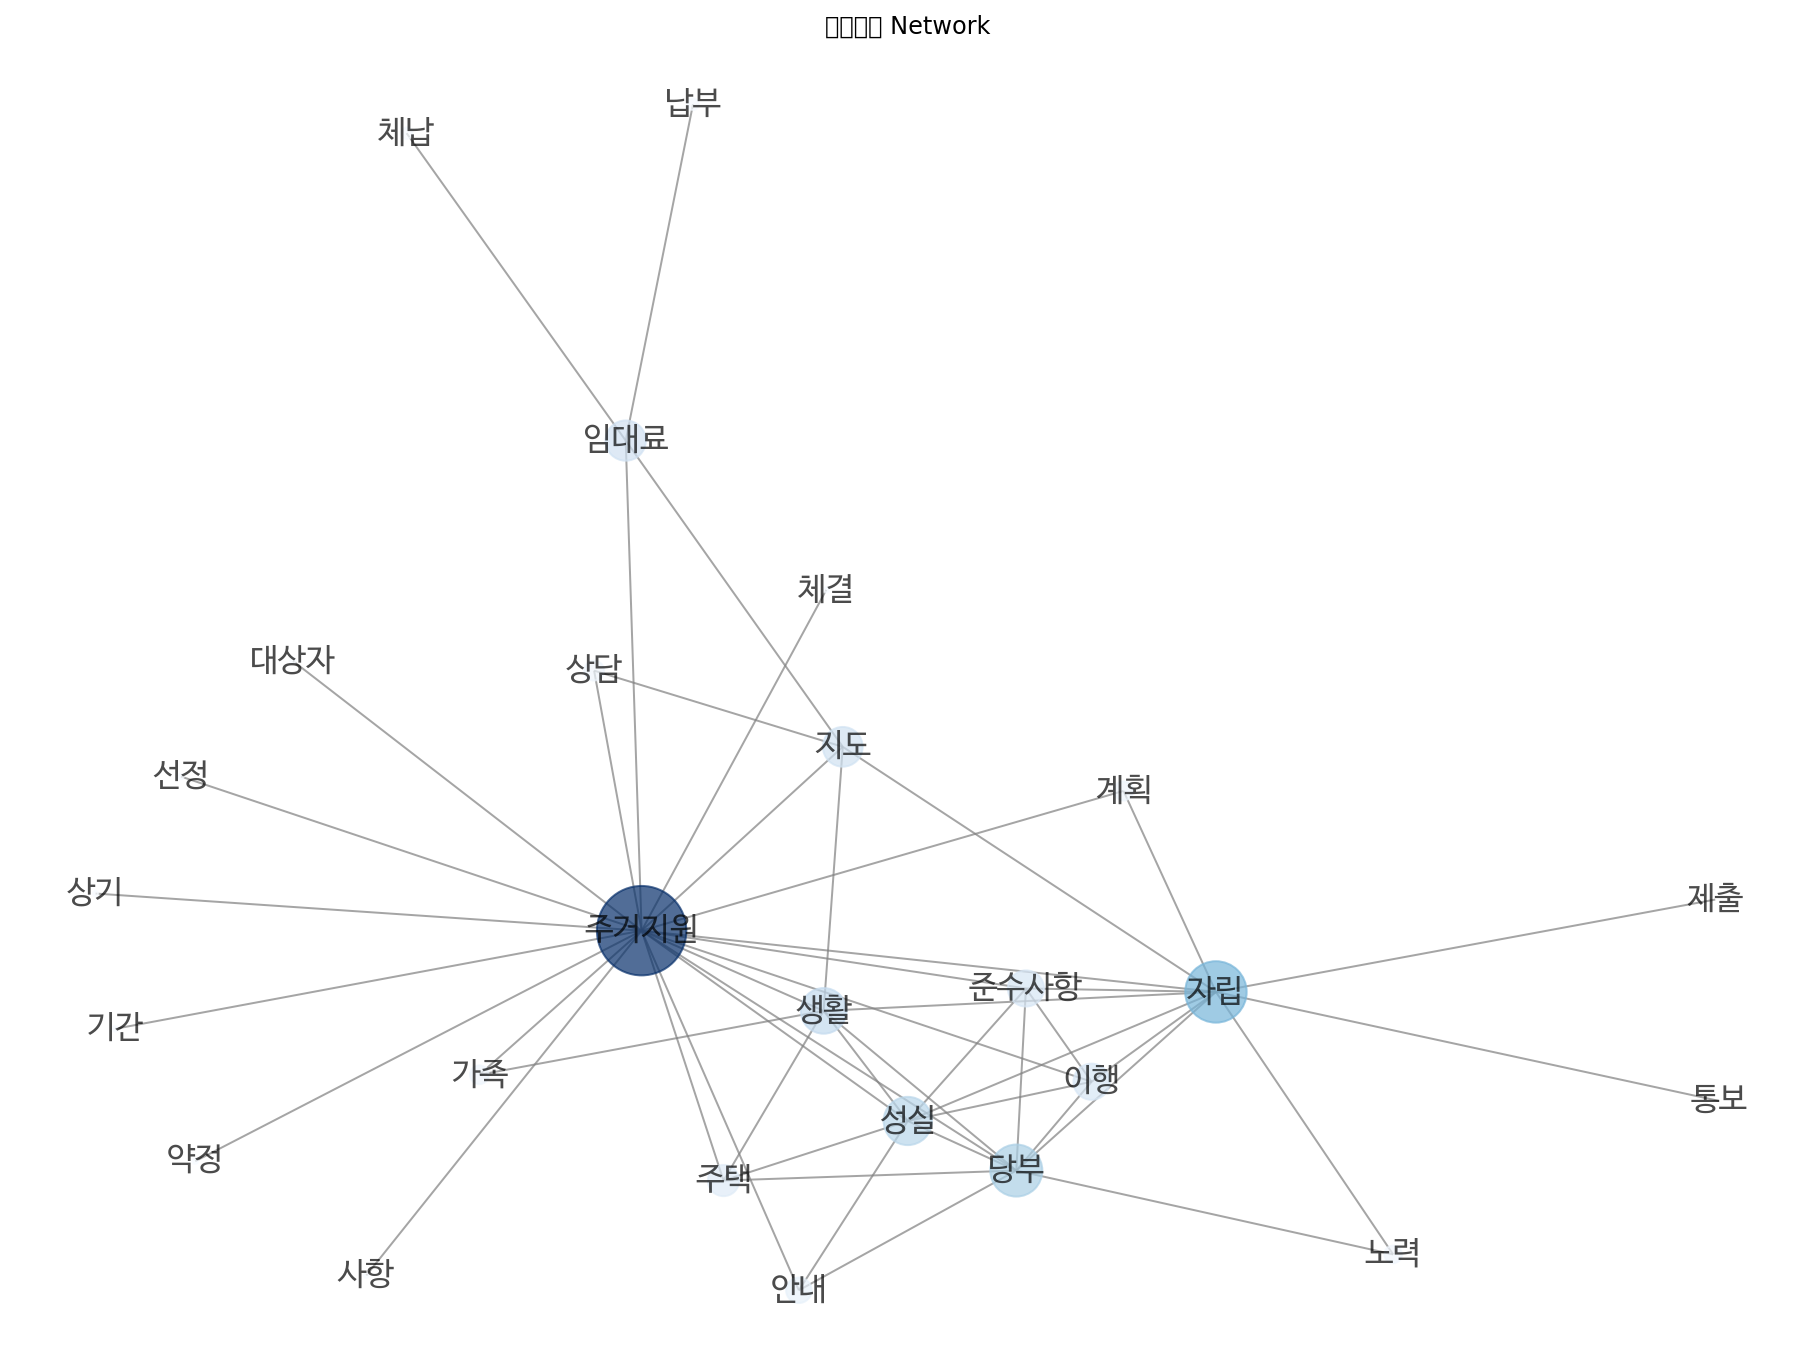

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16,12));plt.axis('off')
nx.draw_networkx(G,font_family = "NanumBarunGothic",font_size = 16,
                pos=pos,node_color=list(pr.values()),node_size=nsize,
                alpha=0.7,edge_color = '.5',cmap=plt.cm.Blues)
plt.axes().set_title('주거지원 Network')
plt.savefig('주거지원_네트워크.png',bbox_inches='tight')

# 연관어분석

In [ ]:
import sys
import csv
import seaborn as sns
#from konlpy.tag import Okt
#okt = Okt()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

#sns.set(font="NanumGothicBold", 
#        rc={"axes.unicode_minus":False},
#        style='darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


** **제일 먼저 한글폰트지정** **

In [ ]:
#from matplotlib import font_manager, rc
#path =  '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
#font_name1 = font_manager.FontProperties(fname = path, size = 50).get_name()
#plt.rc('font', family = 'NanumGothicBold')

#font_path = font_manager.FontProperties(fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
#font_name = font_path.get_name()
#rc('font', family = font_name)
#plt.rcParams['font.family'] = 'NanumGothic'

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

#런타임 다시시작

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.


In [ ]:
max(group)

7

In [ ]:
def get_processed_data(df):
    
   # query = df[(df.GROUP == groupnum)]
    query = df
    q1 = query[['CONSULT_CONT', 'CONSULT_DATE']].dropna()
    q1.columns = ['DSJ_CARD_NO', 'CONSULT_DATE']
    q2 = query[['CONSULT_CONT', 'CONSULT_DATE']].dropna()    
    q2.columns = ['DSJ_CARD_NO', 'CONSULT_DATE']

    q = q1.append(q2)
    q.index = range(len(q))

    #q['preprocess'] = q.DSJ_CARD_NO.apply(lambda text : " ".join(twitter.morphs(text)))

    q['preprocess'] = q.DSJ_CARD_NO.apply(lambda text : " ".join(noun for noun in twitter.nouns(text) if len(noun)>1))
    cnt = Counter(word for line in q.preprocess for word in line.split())
    return q, cnt

#for i in range(max(group)):
#  query_i, counter_i = get_processed_data(a_sample,i)


In [ ]:
query_1, counter_1 = get_processed_data(groupA)
#query_2, counter_2 = get_processed_data(groupB)
#query_3, counter_3 = get_processed_data(groupC)
#query_4, counter_4 = get_processed_data(groupD)
#query_5, counter_5 = get_processed_data(groupE)
#query_6, counter_6 = get_processed_data(groupF)

In [ ]:
query_1_new = query_1.sample(frac = 0.5, random_state=1)

In [ ]:
for val in wordsF.values():
  if val in condition:
    wordsF.remove(val)

In [ ]:
df = pd.DataFrame([wordsA, wordsB, wordsC, wordsD, wordsE]).T
df.columns = ['첫 1개월', '2~5개월', '6~12개월', '13~24개월', '25개월~']


만약 상대적인 분포 알고 싶으면 (그 그룹내에 최대 빈도가 1, 아닐수록 0에 가깝), apply 안쓰면 절대적인 빈도수 출력

In [ ]:
df = df.apply(lambda x : x / np.sum(x))
df = df.apply(lambda x : (x-np.min(x)) / (np.max(x)-np.min(x)))

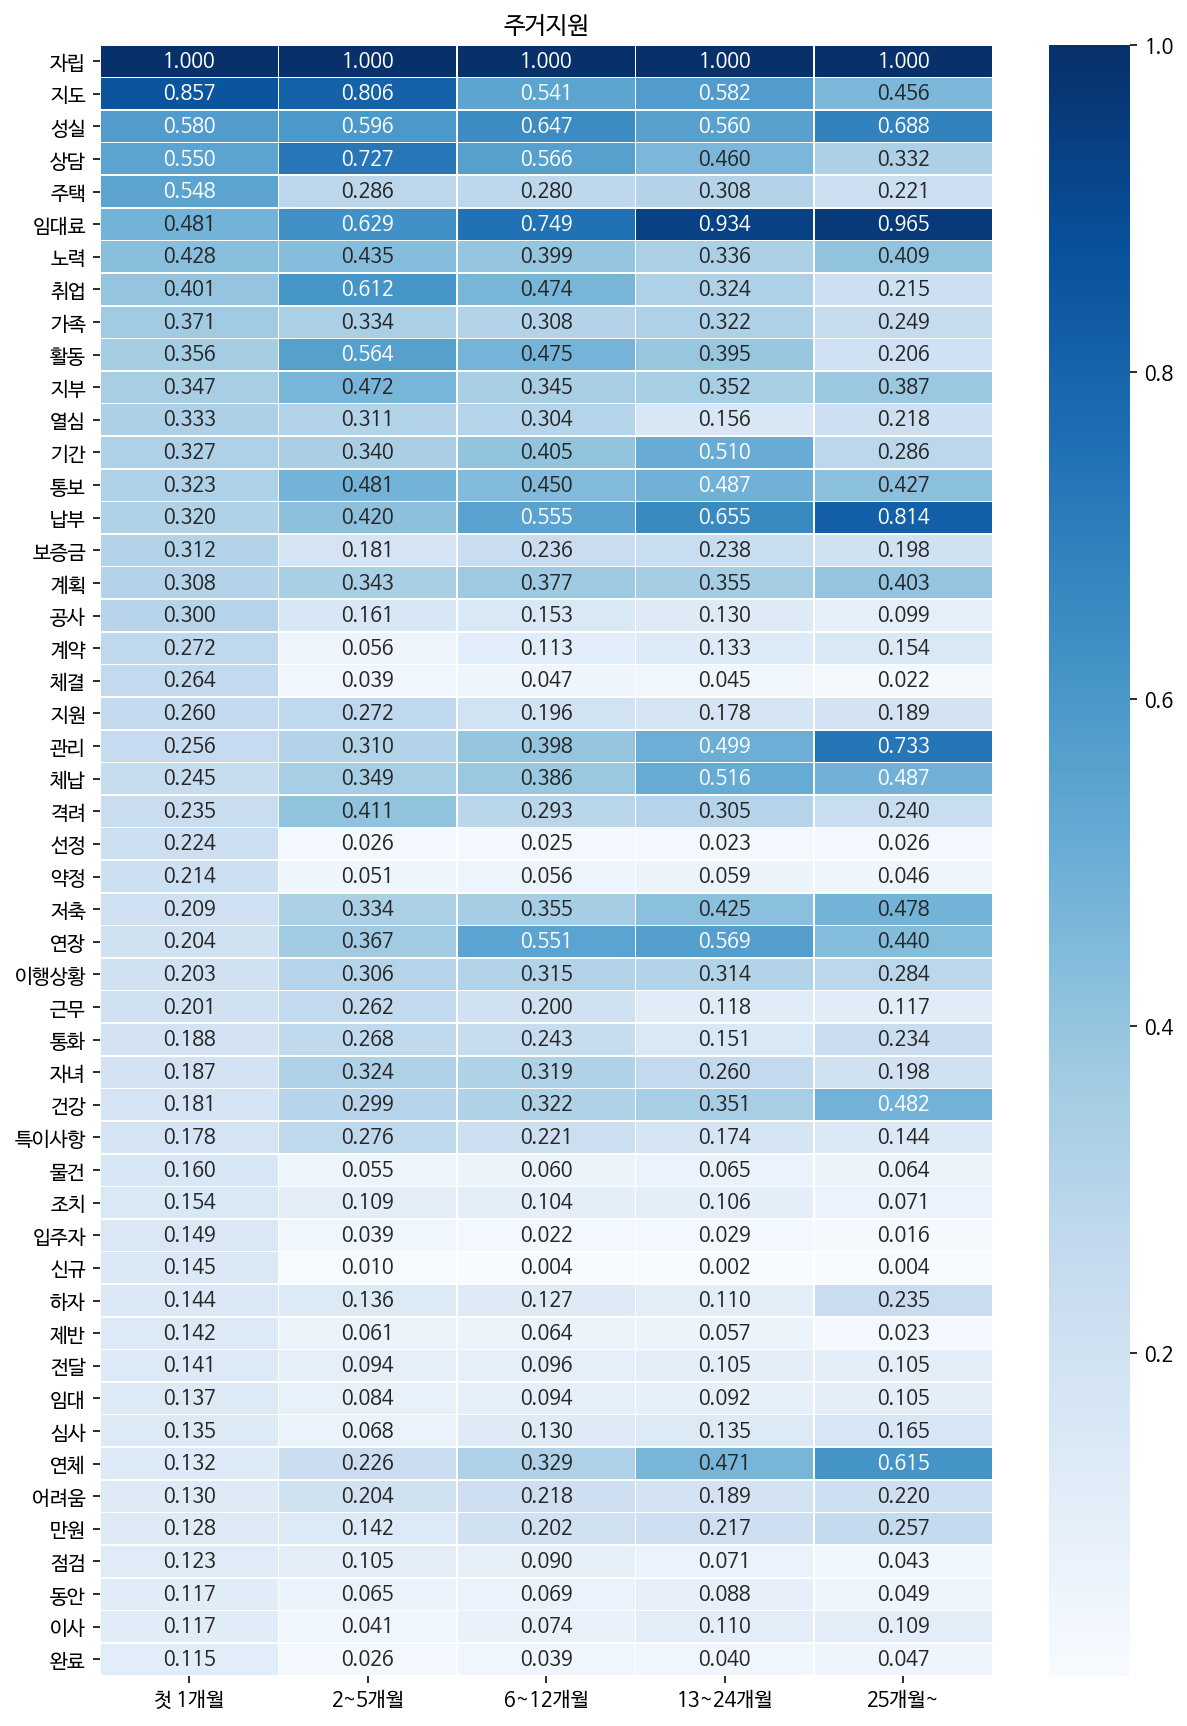

In [ ]:
plt.figure(figsize=(10,15))
ax = plt.axes()
sns.heatmap(df.sort_values(df.columns[0], ascending=False).iloc[:50], annot=True, fmt = '.3f', linewidths=0.3, cmap = 'Blues', ax = ax)
ax.set_title('주거지원')
plt.show()
# cbar는 오른쪽에 있는 막대(범주)를 표시 annot는 계수를 표시annot_kws는 글자 크기를 지정 fmt :소수점 자리수 지정 square는 정사각형으로 지정, False로 설정시 직사각형 cmap 색상을 지정


In [ ]:
plt.savefig('주거지원 heatmap2.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
type(wordsE)

dict

In [ ]:
wordsA_ls = sorted(wordsA.items(), key=lambda x: x[1], reverse=True)
wordsB_ls = sorted(wordsB.items(), key=lambda x: x[1], reverse=True)
wordsC_ls = sorted(wordsC.items(), key=lambda x: x[1], reverse=True)
wordsD_ls = sorted(wordsD.items(), key=lambda x: x[1], reverse=True)
wordsE_ls = sorted(wordsE.items(), key=lambda x: x[1], reverse=True)
#wordsF_ls = sorted(wordsF.items(), key=lambda x: x[1], reverse=True)

NameError: ignored

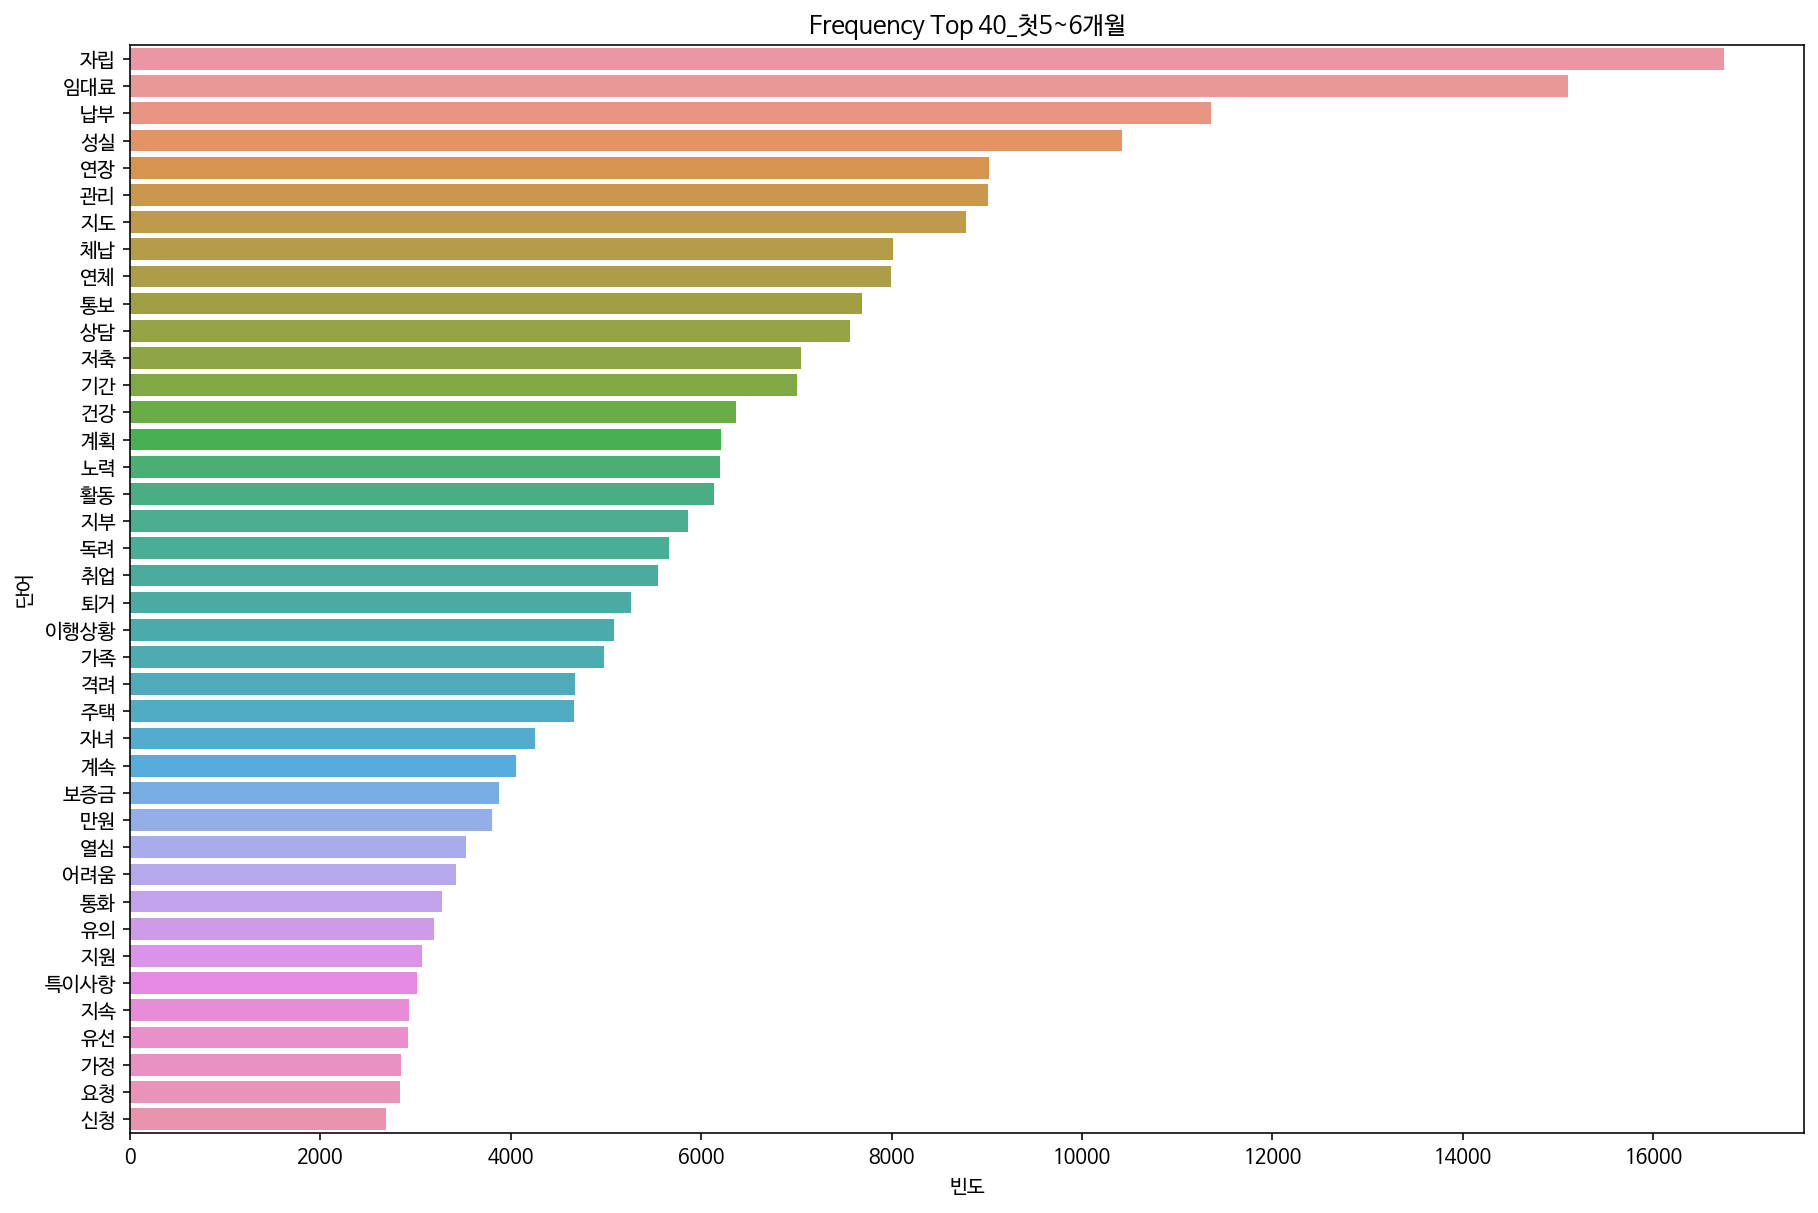

In [ ]:
fontprop = fm.FontProperties(fname= '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', size=20)
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor('white')
max = 40
sns_plot=sns.barplot([i[1] for i in wordsF_ls[:40]],
            [i[0] for i in wordsF_ls[:max]])
sns_plot.set_title("Frequency Top 40_첫5~6개월")
sns_plot.set_ylabel("단어")
sns_plot.set_xlabel("빈도")
fig = sns_plot.get_figure()
fig.savefig('Freq_groupF.png')

# 폰트 정리

In [ ]:
print ('설정파일 위치: ', matplotlib.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:10] 

# word2vec

In [ ]:
for i in condition:
  if i in query_1_new.preprocess:
    del wordsA[i]
  else:
    pass



In [ ]:
query_1_new.preprocess

3080         자립 통보 접수 목포 소재 대우조선소 이후 취업 예정 현재 실업 급여 생활 중임
4276    임대주택 주한 개월 지난 관계 주택 하자 환경 적응 점검 공단 주거지원 사업 취지 ...
2680    지부 방문 상담 본인 지게차 운전 생업 종사 건강 요양 병행 면서 생활 자가 금년 ...
6021    작년 합동 결혼식 싱글벙글 기쁨 참여 모습 사시 장차 시술 것임 현재 설공 전망 열...
6373                        현재 택배 열심 명절 시간 상담 서두 전하 도록 면담
                              ...                        
3147    주거지원 선정 심사 재선 전하 수원 소재 이사 예정자 이사 주가 임대 보증금 자립 ...
4360    주거지원 입주자 물건 계약 주거지원 약정 체결 입주자 준수사항 대하 안내 성실 생활...
1107                                수술 인하 예치금 일시 해지 신청 예치
2618                                자립 고자 서울 자동차 공업 직원 근무
302                   투잡 취업 활동 진중 자립 기반 지속 노력 생활 안정 도록 독려
Name: preprocess, Length: 3620, dtype: object

In [ ]:
from gensim.models import Word2Vec

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
#query, counter = get_processed_data(groupA)
embedding_model = Word2Vec([line.split() for line in query_1_new.preprocess], size=100, window=5, min_count=20, workers=4, iter=50, sg=1)

2020-08-24 08:10:59,158 : INFO : collecting all words and their counts
2020-08-24 08:10:59,164 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-08-24 08:10:59,185 : INFO : collected 3941 word types from a corpus of 64022 raw words and 3620 sentences
2020-08-24 08:10:59,186 : INFO : Loading a fresh vocabulary
2020-08-24 08:10:59,193 : INFO : effective_min_count=20 retains 478 unique words (12% of original 3941, drops 3463)
2020-08-24 08:10:59,194 : INFO : effective_min_count=20 leaves 51607 word corpus (80% of original 64022, drops 12415)
2020-08-24 08:10:59,201 : INFO : deleting the raw counts dictionary of 3941 items
2020-08-24 08:10:59,205 : INFO : sample=0.001 downsamples 85 most-common words
2020-08-24 08:10:59,207 : INFO : downsampling leaves estimated 34697 word corpus (67.2% of prior 51607)
2020-08-24 08:10:59,210 : INFO : estimated required memory for 478 words and 100 dimensions: 621400 bytes
2020-08-24 08:10:59,212 : INFO : resetting layer weigh

In [ ]:
#for line in query_1.preprocess:
#  print(line.split())

In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio
chart_studio.tools.set_credentials_file(username='yujini', api_key='TKC5yY0zI34MCtR4k7P3')

In [ ]:
import plotly
#plotly.tools.set_credentials_file(username='YOUR_NAME', api_key='YOUR_KEY')
from sklearn.manifold import TSNE

import chart_studio.plotly as py
import plotly.graph_objs as go

from glob import glob

In [ ]:
X = np.array([embedding_model.wv.get_vector(word) for word in embedding_model.wv.vocab.keys()])
voca = list(embedding_model.wv.vocab.keys())
X_embeded = TSNE(n_components=2, perplexity=5,metric='cosine', early_exaggeration=50, n_iter = 10000, verbose=1 ).fit_transform(X)

TSNE 분석: (t-distributed Stochastic Neighbor Embedding)
고차원 공간에서의 유클리디안 거리 측정 방법을 활용하여 데이터 포인트의 유사성을 표현하는 조건부 확률로 변환하는 방법
(고차원의 데이터 차원 축소 방법)


In [ ]:
trace2 = go.Scatter(
    x=[x for x, y in X_embeded],
    y=[y for x, y in X_embeded],
    mode='markers+text',
    name='Markers and Text',
    text=voca,
    textposition='bottom center'
)

data = trace2
layout = go.Layout(
    title = "주거지원"
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='text-chart-basic')

In [ ]:
!pip install jange

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

In [ ]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


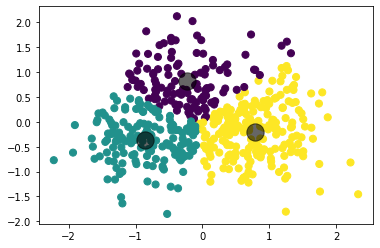

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)

In [ ]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

NameError: ignored

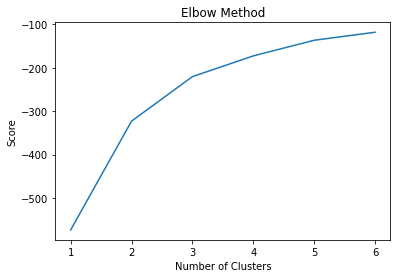

In [ ]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
idx2word = {ii: wordsA for ii, wordsA in enumerate(noun_adj_adv_listA)}
idx2word

{0: '주거지원자',
 1: '선정',
 2: '주거',
 3: '제시',
 4: '선택',
 5: '설명',
 6: '전화통화',
 7: '주거지원',
 8: '임대',
 9: '보증금',
 10: '전세',
 11: '전환',
 12: '전세',
 13: '전환',
 14: '대한',
 15: '임대',
 16: '보증금',
 17: '본인',
 18: '특허',
 19: '관련',
 20: '사업',
 21: '고자',
 22: '공사',
 23: '협의',
 24: '본인',
 25: '연락',
 26: '해주',
 27: '전하',
 28: '특별',
 29: '사유',
 30: '불가능',
 31: '담당자',
 32: '방법',
 33: '모색',
 34: '전함',
 35: '지부',
 36: '문하',
 37: '상담',
 38: '창업',
 39: '지원',
 40: '자신',
 41: '사업',
 42: '시작',
 43: '임대료',
 44: '월세',
 45: '만원',
 46: '정도',
 47: '충분',
 48: '면서',
 49: '공사',
 50: '임대',
 51: '보증금',
 52: '전세',
 53: '전환',
 54: '요구',
 55: '공사',
 56: '로부터',
 57: '월세',
 58: '계약',
 59: '전환',
 60: '환급',
 61: '열심',
 62: '다시',
 63: '전세',
 64: '전환',
 65: '도록',
 66: '지도',
 67: '부동산',
 68: '중개',
 69: '보조',
 70: '주택',
 71: '경기',
 72: '불황',
 73: '인하',
 74: '어려움',
 75: '격려',
 76: '지도',
 77: '전달',
 78: '변동사항',
 79: '포스코건설',
 80: '협력',
 81: '업체',
 82: '양로',
 83: '지스',
 84: '직원',
 85: '근무',
 86: '본인',
 87: '통화',
 88: '주거지원',
 89: '이행

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from future.utils import iteritems

In [ ]:
str(listsA)

"['  주거지원자로 선정되었고  앞으로 주거가 제시되면 선택하여 입주토록 할 것을 설명해 줌.'\n '전화통화를 하였으며, 주거지원 임대보증금을 전세로 전환하였는데 전세전환분에 대한 임대보증금을 회수하여 본인의 특허와 관련한 사업장을 갖추고자 한다고 하여 LH공사와 협의를 하여 본인에게 연락을 해주겠다고 전하고 특별한 사유가 없으면 불가능하다고 들었는데 담당자와 방법이 있는지를 모색해 보겠다고 전함 '\n '지부를 방문하여 상담을 하였으며, 창업지원센타에서 자신의 사업을 시작할 수 있게되었고 임대료는 월세없이 300만원정도면 충분할것같다면서 LH 공사임대보증금전세전환금을 돌려줄것을 요구하여 LH공사로부터 월세계약으로 전환하고 환급하여 주고 열심히하여 다시 전세로 전환하도록 지도함 '\n ... '상기인의 주거지원 심사와 관련하여 신규대상자로 선정되었음을 유선연락하고 향후 진행절차에 대해 안내조치함'\n '운전 기술 습득을 희망하는 바 수강등록하고 성실히 과정에 임하여 자격취득에 만전을 기할 것을 당부함'\n '주거지원 입주계약서 작성하고 주거주택 현장 지도 방문함.']"

In [ ]:
tf=CountVectorizer()
tf.fit_transform(listsA)
tf.fit_transform(listsA)[0:1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
listsA

array(['  주거지원자로 선정되었고  앞으로 주거가 제시되면 선택하여 입주토록 할 것을 설명해 줌.',
       '전화통화를 하였으며, 주거지원 임대보증금을 전세로 전환하였는데 전세전환분에 대한 임대보증금을 회수하여 본인의 특허와 관련한 사업장을 갖추고자 한다고 하여 LH공사와 협의를 하여 본인에게 연락을 해주겠다고 전하고 특별한 사유가 없으면 불가능하다고 들었는데 담당자와 방법이 있는지를 모색해 보겠다고 전함 ',
       '지부를 방문하여 상담을 하였으며, 창업지원센타에서 자신의 사업을 시작할 수 있게되었고 임대료는 월세없이 300만원정도면 충분할것같다면서 LH 공사임대보증금전세전환금을 돌려줄것을 요구하여 LH공사로부터 월세계약으로 전환하고 환급하여 주고 열심히하여 다시 전세로 전환하도록 지도함 ',
       ..., '상기인의 주거지원 심사와 관련하여 신규대상자로 선정되었음을 유선연락하고 향후 진행절차에 대해 안내조치함',
       '운전 기술 습득을 희망하는 바 수강등록하고 성실히 과정에 임하여 자격취득에 만전을 기할 것을 당부함',
       '주거지원 입주계약서 작성하고 주거주택 현장 지도 방문함.'], dtype='<U464')

In [ ]:
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
A_tfidf_sp = tfidf.fit_transform(query_1_new.preprocess)
tfidf_dict = tfidf.get_feature_names()

In [ ]:
tfidf_dict

In [ ]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(3620, 100)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 2.179585
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.605286
[t-SNE] KL divergence after 5250 iterations: 0.530032


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



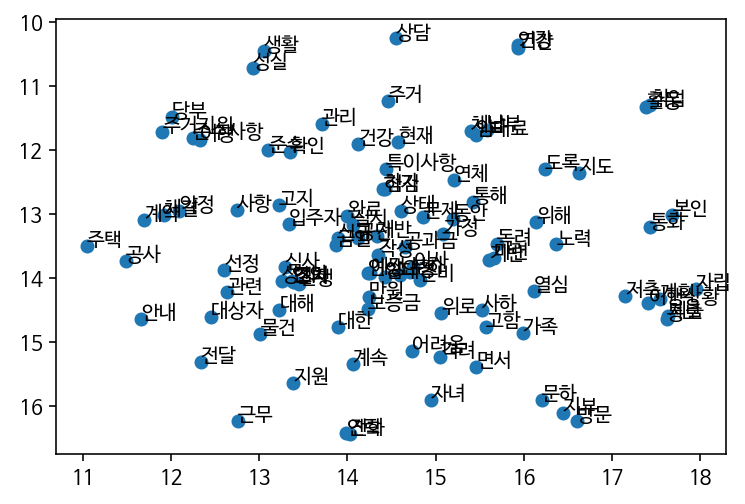

<Figure size 36000x2160 with 0 Axes>

In [ ]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
Z = tsne.fit_transform(data_array.T)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#fontprop = fm.fontProperties(fname=font_path, size=18)
plt.scatter(Z[:,0], Z[:,1])


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



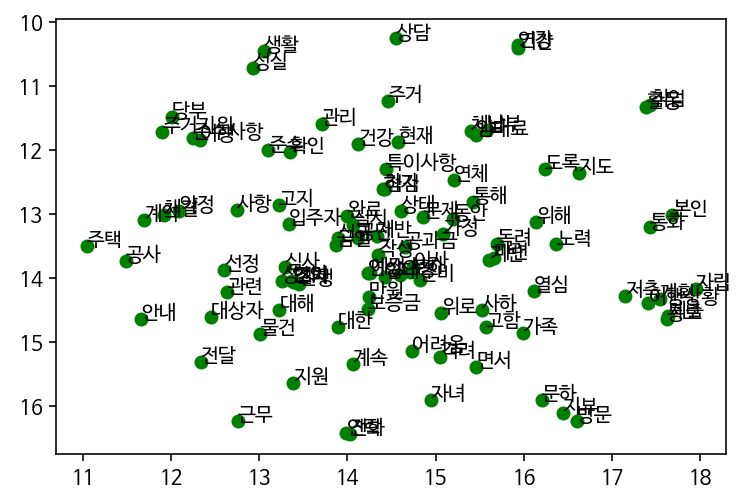

<Figure size 7200x5040 with 0 Axes>

In [ ]:
plt.scatter(Z[:,0], Z[:,1], c='g')
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))

plt.figure(figsize=(100,70))
plt.draw()

In [ ]:
def find_analogies(w1, w2, w3, emb, word2idx):
    pos_word1 = emb[word2idx[w1]]
    pos_word2 = emb[word2idx[w2]]
    neg_word1 = emb[word2idx[w3]]
    v0 = pos_word1 + pos_word2 - neg_word1

    def dist1(a, b):
        return np.linalg.norm(a - b)
    def dist2(a, b):
        return 1 - a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

    for dist, name in [(dist1, 'Euclidean'), (dist2, 'cosine')]:
        min_dist = float('inf')
        best_word = ''
        for word, idx in iteritems(word2idx):
            if word not in (w1, w2, w3):
                v1 = emb[idx]
                d = dist(v0, v1)
                if d < min_dist:
                    min_dist = d
                    best_word = word
        print("closest match by", name, "distance:", best_word)
        print(w1, "-", w2, "=", w3, "-", best_word)

In [ ]:
analogies_to_try = (
    ('건강', '관리','지도' ),
)

word2idx = {word: ii for ii, word in enumerate(tfidf.get_feature_names())}
word2idx

for word_list in analogies_to_try:
    print(word_list)
    w1, w2, w3 = word_list
    find_analogies(w1=w1, w2=w2, w3=w3, emb=Z, word2idx=word2idx)

('건강', '관리', '지도')
closest match by Euclidean distance: 당부
건강 - 관리 = 지도 - 당부
closest match by cosine distance: 면서
건강 - 관리 = 지도 - 면서


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizor = TfidfVectorizer(stop_words = stopwords,#tokenizer = tokenize_and_stem,
                             max_features = 200)
tf_idf = tf_idf_vectorizor.fit_transform(X)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

AttributeError: ignored

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(X, prediction, 15)


NameError: ignored